# Exploratory data analysis

 * [Dev variables](#Dev-variables)
 * [Load data](#Load-data)
 * [Prepare data](#Prepare-data)
 * [EDA](#EDA)
   * [Retention schedule and selection](#Retention-schedule-and-selection)
   * [Repository and folders](#Repository-and-folders)
   * [file extension](#file-extension)
 * [Discussion](#Discussion)

## Dev variables

In [1]:
# data_root_folder='H:/AI_for_Selection/'
data_root_folder='/media/AIDrive/'


## Load data

In [2]:
import os
import sys
import numpy as np
import pandas as pd
import gensim
import spacy
import nltk

import logging
from gensim.summarization import summarize

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

pd.set_option('display.max_colwidth', -1)

In [3]:

folder_path_a = data_root_folder + 'a/'
folder_path_websites = data_root_folder + '/Websites/'
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO) 

In [4]:
#Metadata file is the supplied by MA to us
metadata_file =  data_root_folder + 'objective_files_with_acronyms LATEST.xlsx'
metadata_df = pd.read_excel(open(metadata_file,'rb'), sheet_name='objective_files_with_acronyms', nrows=118677)

In [5]:
len(metadata_df)

118677

## Prepare data

In [6]:
metadata_df.columns

Index(['Unnamed: 0', 'documentid', 'objectivefileid', 'fileextension',
       'versionnumber', 'disposal_schedule', 'repository', 'datelastmodified',
       'parent11', 'parent10', 'parent9', 'parent8', 'parent7', 'parent6',
       'parent5', 'parent4', 'parent3', 'parent2', 'parent1', 'objective3',
       'objective2', 'objective1', 'originalname', 'documentname',
       'copyflatlines',
       'To the left there is the full data from the EDRMS.\nTo the right is the data with the acronyms',
       'trim_11', 'trim_10', 'trim_9', 'trim_8', 'trim_7', 'trim_6', 'trim_5',
       'trim_4', 'trim_3', 'trim_2', 'trim_1'],
      dtype='object')

In [7]:
metadata_df = metadata_df.drop(['Unnamed: 0','copyflatlines',
       'To the left there is the full data from the EDRMS.\nTo the right is the data with the acronyms'], axis = 1)

In [8]:
metadata_df.head(5)

,documentid,objectivefileid,fileextension,versionnumber,disposal_schedule,repository,datelastmodified,parent11,parent10,parent9,...,trim_10,trim_9,trim_8,trim_7,trim_6,trim_5,trim_4,trim_3,trim_2,trim_1
0,A3109716,qA35736,xls,2,24 Projects - Full Projects (Close file when Project ends),Strategic Projects,00:42:31,"Procurement, Project Delivery and Contract Management",Project Delivery,Projects - Closed,...,PD,PC_1,20YRaCS,GE_1,2012RTR,RTRS2012DS,no name,no name,no name,no name
1,A3133123,qA35736,xls,1,24 Projects - Full Projects (Close file when Project ends),Strategic Projects,00:55:08,"Procurement, Project Delivery and Contract Management",Project Delivery,Projects - Closed,...,PD,PC_1,20YRaCS,GE_1,2012RTR,RTRS2012DS,no name,no name,no name,no name
2,A3097046,qA35736,xls,4,24 Projects - Full Projects (Close file when Project ends),Strategic Projects,00:54:09,"Procurement, Project Delivery and Contract Management",Project Delivery,Projects - Closed,...,PD,PC_1,20YRaCS,GE_1,2012RTR,RTRS2012DS,no name,no name,no name,no name
3,A3113792,qA35736,xls,2,24 Projects - Full Projects (Close file when Project ends),Strategic Projects,00:52:54,"Procurement, Project Delivery and Contract Management",Project Delivery,Projects - Closed,...,PD,PC_1,20YRaCS,GE_1,2012RTR,RTRS2012DS,no name,no name,no name,no name
4,A3115138,qA35736,xls,2,24 Projects - Full Projects (Close file when Project ends),Strategic Projects,00:40:05,"Procurement, Project Delivery and Contract Management",Project Delivery,Projects - Closed,...,PD,PC_1,20YRaCS,GE_1,2012RTR,RTRS2012DS,no name,no name,no name,no name


In [9]:
print("check there are as many documents as unique documentid: %r, \n unique document ids: %i" % ((len(metadata_df.documentid.unique()) == len(metadata_df)),len(metadata_df.documentid.unique())))

check there are as many documents as unique documentid: True, 
 unique document ids: 118677


In [10]:
metadata_df['ret_schedule']= metadata_df['disposal_schedule'].apply(lambda x: x.split()[0] )

In [23]:
metadata_df['selected'] =  metadata_df['ret_schedule'].apply(lambda x: True if x in(('04', '06','15b','17','21','33','34','35','36')) else False)

## EDA

### Retention schedule and selection

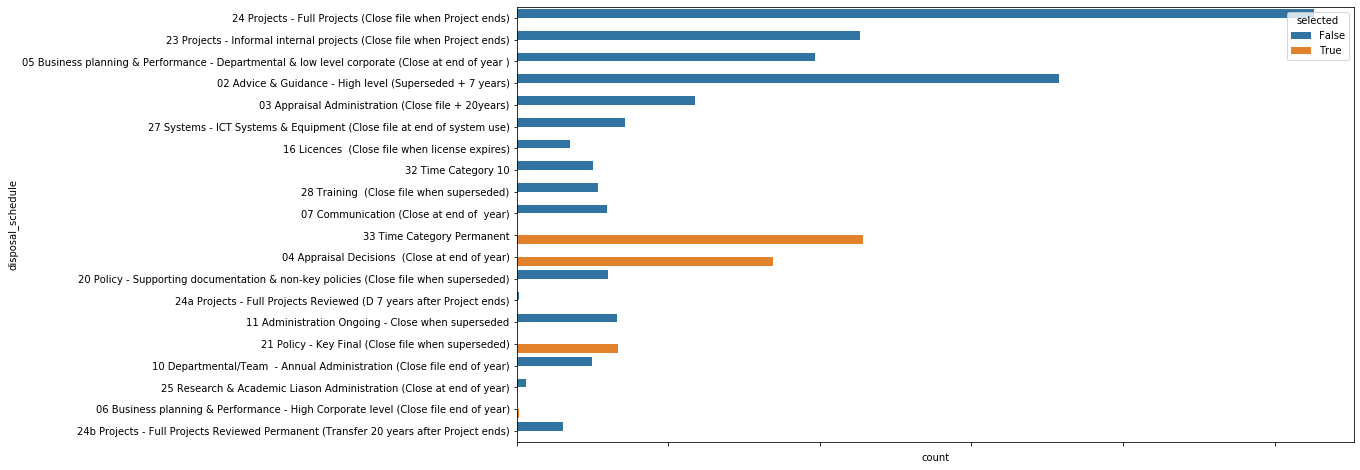

In [31]:
plt.figure (figsize=(15,8))
p = sns.countplot(y='disposal_schedule',data=metadata_df,hue='selected')

### Repository and folders

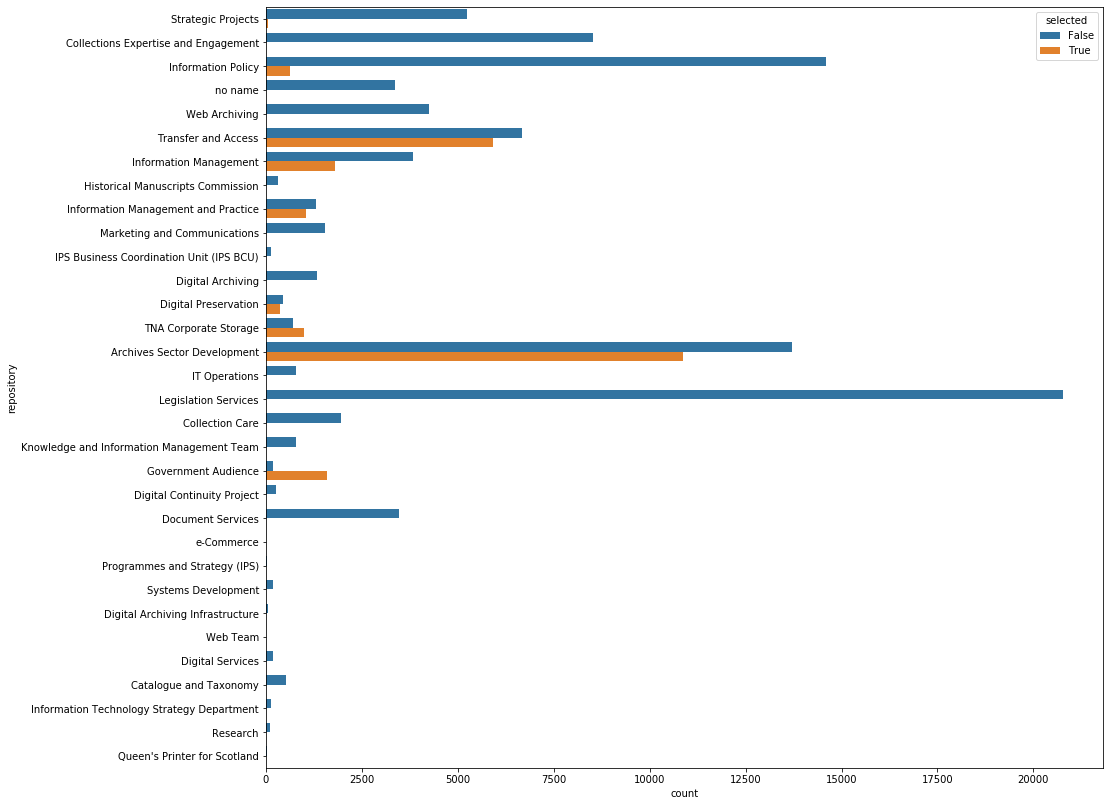

In [33]:
plt.figure (figsize=(15,14))
p = sns.countplot(y='repository',data=metadata_df,hue='selected')
# p.set_xticklabels(p.get_xticklabels(),rotation = 90);

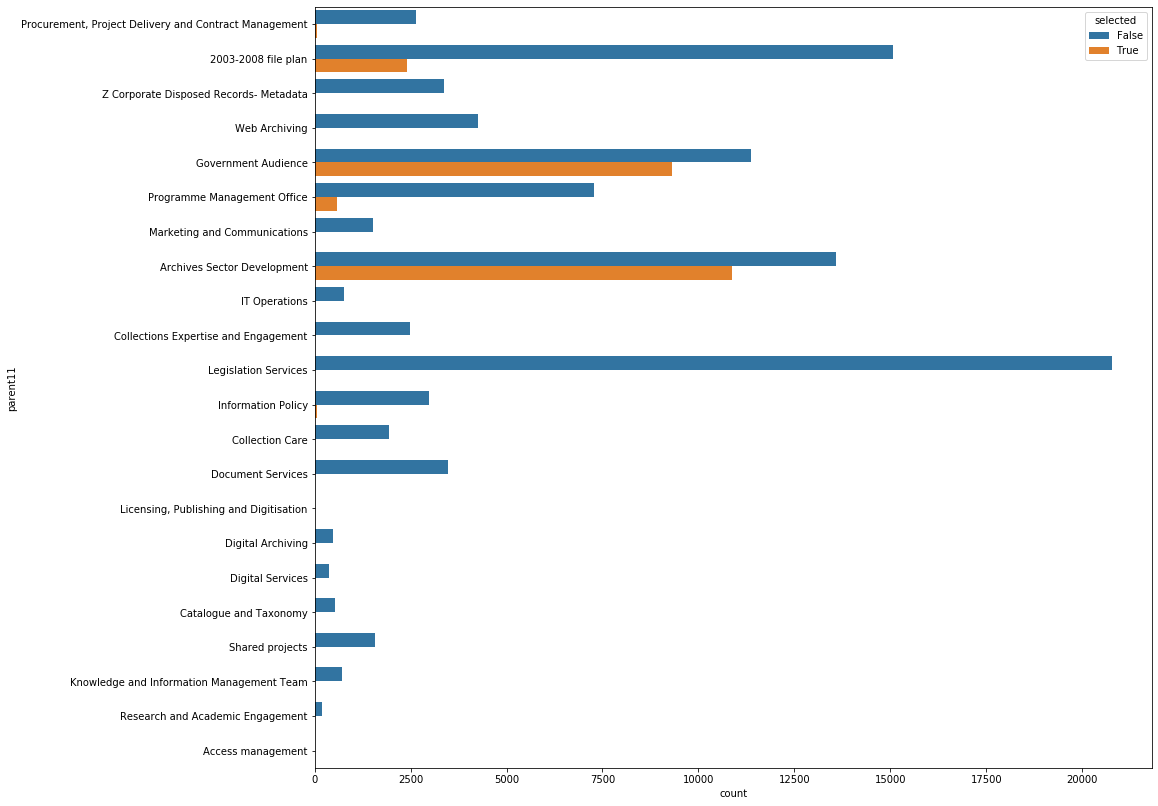

In [105]:
plt.figure (figsize=(15,14))
p = sns.countplot(y='parent11',data=metadata_df,hue='selected')
# metadata_df.parent11.unique()

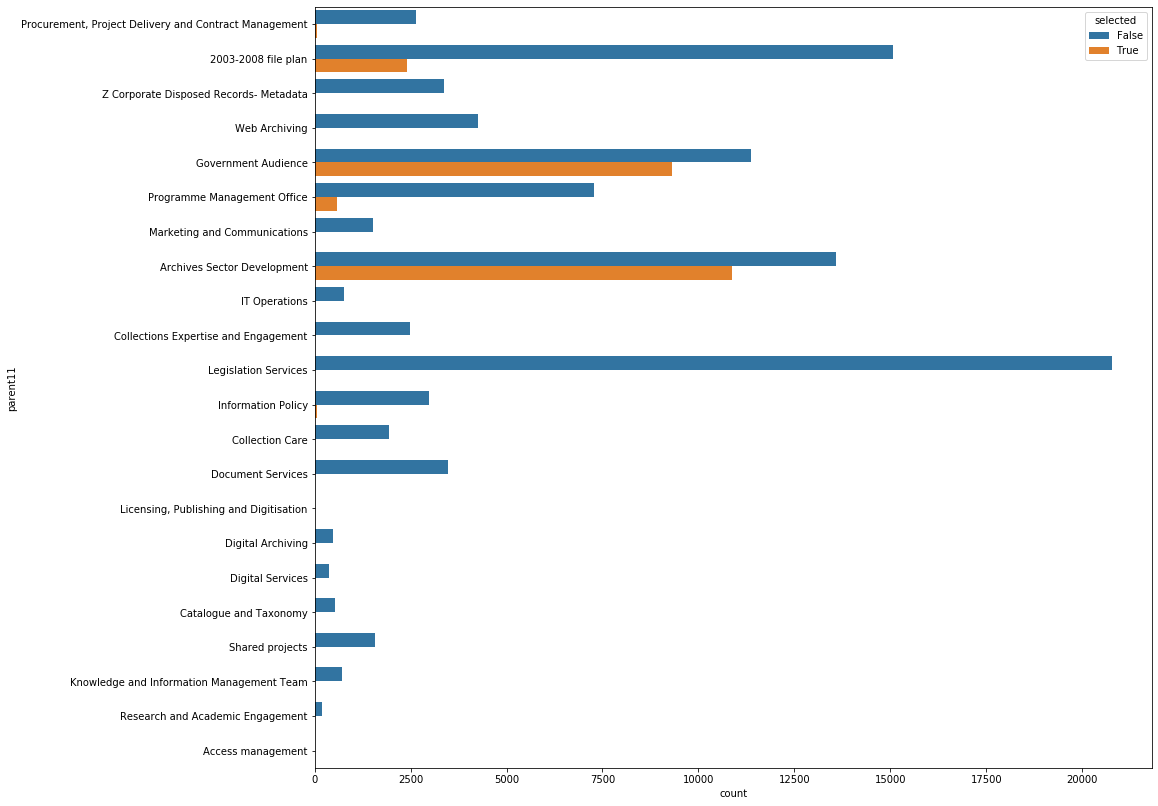

In [105]:


# plt.figure (figsize=(15,14))
# p = sns.countplot(y='parent11',data=metadata_df,hue='selected')
# metadata_df.parent11.unique()

In [128]:
most_selected_parent_folders=(metadata_df[metadata_df.selected==True]['parent11'].value_counts()>100);
most_selected_parent_folders=most_selected_parent_folders[most_selected_parent_folders].index.values;
print("number of folders with most selected files: %i" % len(most_selected_parent_folders))

number of folders with most selected files: 4


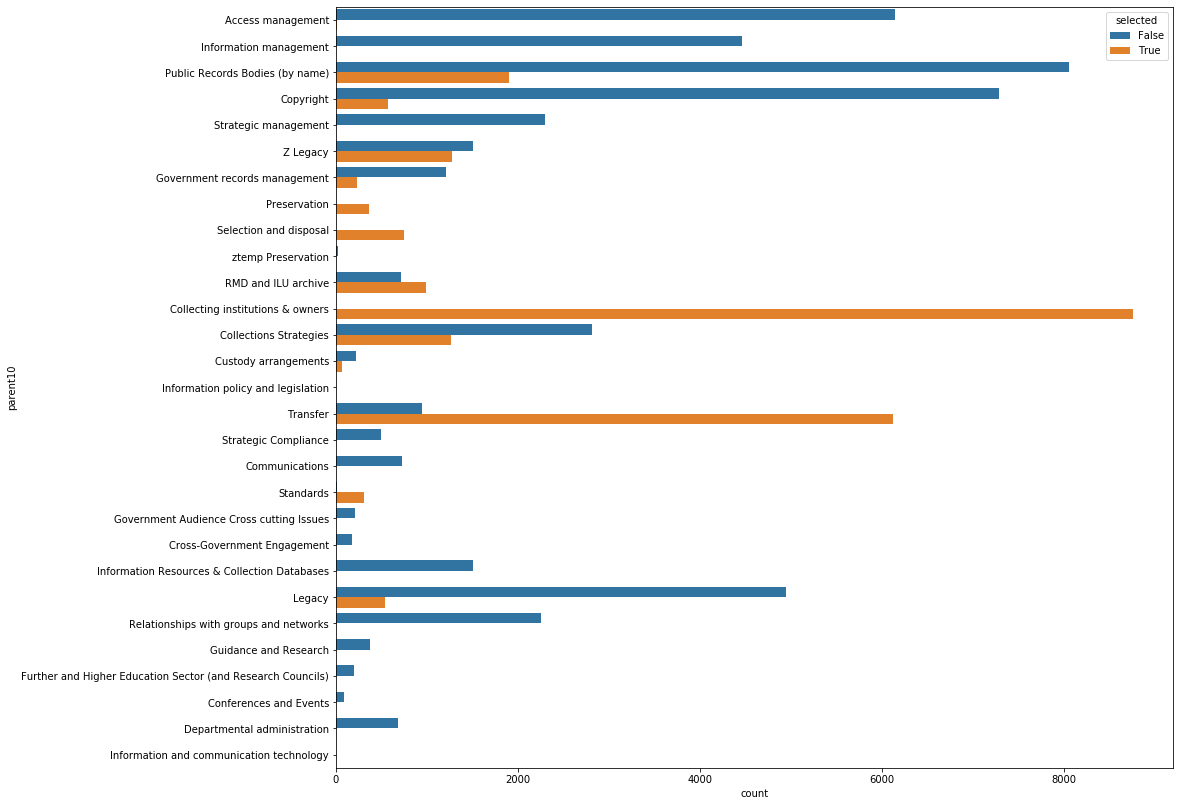

In [129]:
plt.figure (figsize=(15,14))
p = sns.countplot(y='parent10',data=metadata_df[metadata_df.parent11.isin(most_selected_parent_folders)],hue='selected')

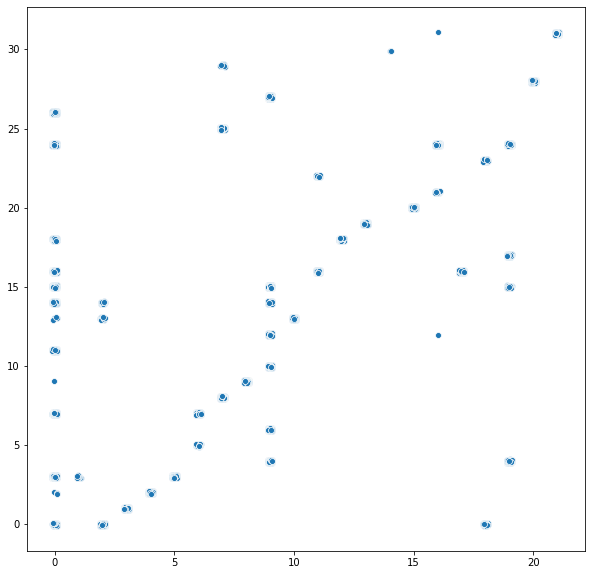

In [119]:
# comparing repository with parent folder

metadata_df.parent11=pd.Categorical(metadata_df.parent11)
metadata_df.repository=pd.Categorical(metadata_df.repository)

# https://stackoverflow.com/questions/56347325/matplotlib-dot-plot-with-two-categorical-variables

plt.figure (figsize=(10,10))
axes = sns.scatterplot(x=metadata_df.parent11.cat.codes+np.random.uniform(-0.1,0.1, len(metadata_df)), 
                       y=metadata_df.repository.cat.codes+np.random.uniform(-0.1,0.1, len(metadata_df)),
#                        size=metadata_df.tip
                      )


there is a correlation between repository and file structure. so file structure will help just as much as repository

### file extension

In [95]:
metadata_df['fileextension_cleaned']=metadata_df.fileextension.str.lower()

In [96]:
most_frequent_fileextensions=(metadata_df['fileextension_cleaned'].value_counts()>400)
most_frequent_fileextensions=most_frequent_fileextensions[most_frequent_fileextensions].index.values

In [97]:
print("there are %i documents with rare fileextension" % len(metadata_df[(~metadata_df.fileextension_cleaned.isin(most_frequent_fileextensions))]))
print("there are %i selected documents with rare fileextension" % len(metadata_df[(~metadata_df.fileextension_cleaned.isin(most_frequent_fileextensions))&(metadata_df.selected)]))

there are 2433 documents with rare fileextension
there are 344 selected documents with rare fileextension


In [98]:
metadata_df.loc[~metadata_df.fileextension.isin(most_frequent_fileextensions),'fileextension_cleaned']='other'

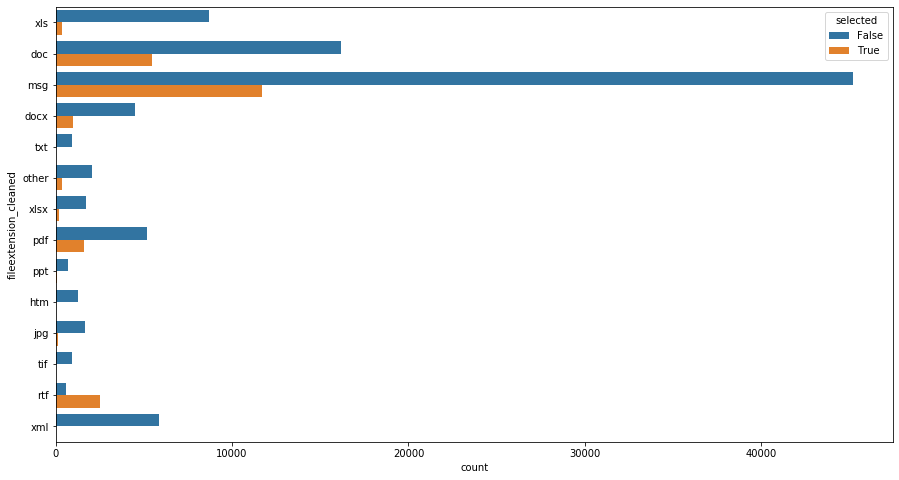

In [100]:
plt.figure (figsize=(15,8))
p = sns.countplot(y='fileextension_cleaned',data=metadata_df,hue='selected')

In [132]:
most_frequent_fileextensions=(metadata_df['fileextension_cleaned'].value_counts()>2000)
most_frequent_fileextensions=most_frequent_fileextensions[most_frequent_fileextensions].index.values
metadata_df['fileextension_cleaned_more']=metadata_df.fileextension.str.lower()
metadata_df.loc[~metadata_df.fileextension.isin(most_frequent_fileextensions),'fileextension_cleaned_more']='other'

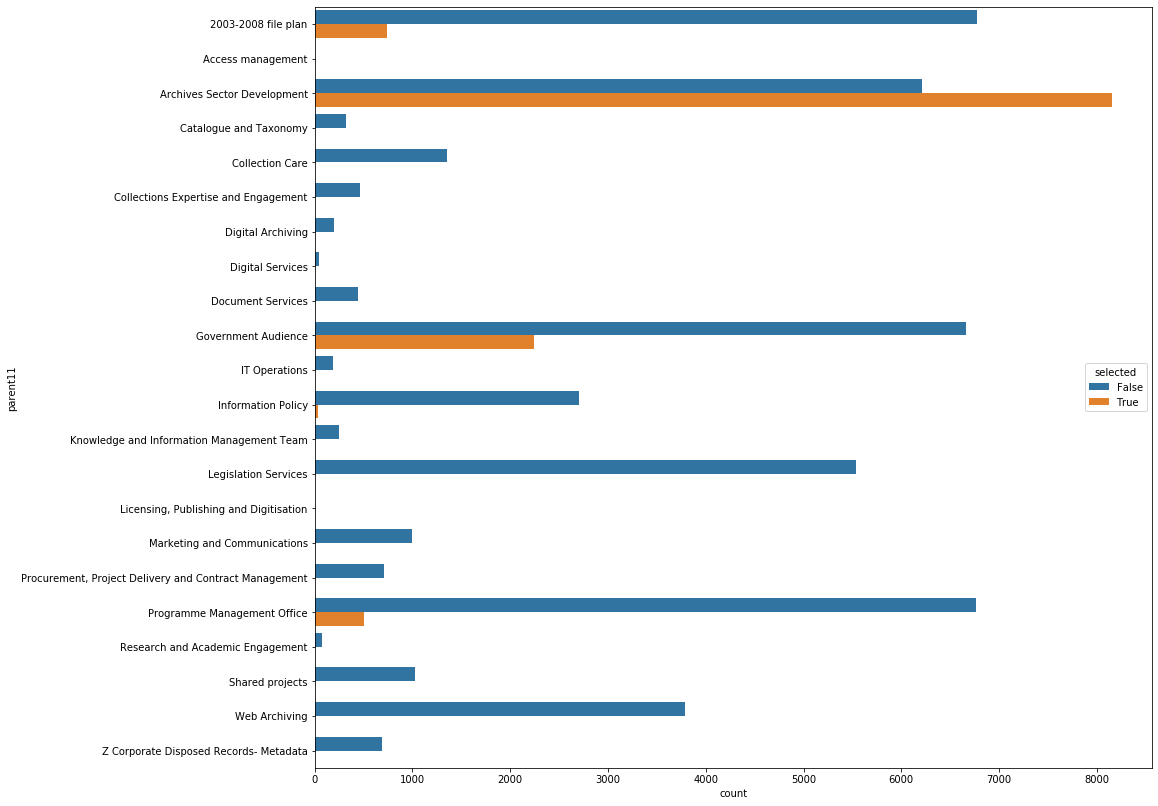

In [136]:
plt.figure (figsize=(15,14))
p = sns.countplot(y='parent11',data=metadata_df[metadata_df.fileextension_cleaned=="msg"],hue='selected')

### Discussion

repository not given by default in data, but very close to folder structure

For the folder structure and file extension, we can see clearly that some have selected documents, some others don't at all. When we combine both features, we can more easily find documents to select.

So given a dataset, where we have a random subset of it labelled, I think we can build a decision tree classifier that can classify most of them.